<a href="https://colab.research.google.com/github/Smita569/E-commerce_Marketing_and_sales/blob/main/E_commerce_Marketing_and_sales_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement 📈

The e-commerce company aims to leverage **data-driven insights** 🧠 to enhance:

*   Customer Acquisition 🤝
*   Customer Retention ✅
*   Revenue Optimization 💰

The following analysis will be conducted to:

*   Understand key business trends 📊
*   Improve decision-making 🤔

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#!git clone https://github.com/Smita569/E-commerce_Marketing_and_sales.git

Cloning into 'E-commerce_Marketing_and_sales'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 60 (delta 30), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (60/60), 845.20 KiB | 2.13 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [4]:
# Upload csv files into dataframe

df_customerData = pd.read_csv('E-commerce_Marketing_and_sales/CustomersData.csv')
df_discountCoupon = pd.read_csv('E-commerce_Marketing_and_sales/Discount_Coupon.csv')
df_marketingSpend = pd.read_csv('E-commerce_Marketing_and_sales/Marketing_Spend.csv')
df_onlineSales = pd.read_csv('E-commerce_Marketing_and_sales/Online_Sales.csv')
df_taxAmount=pd.read_csv('E-commerce_Marketing_and_sales/Tax_amount.csv')


In [ ]:
# Read customer data
df_customerData.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [ ]:
# Read discount coupon data
df_discountCoupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [ ]:
# Read marketing spend data
df_marketingSpend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [ ]:
# Read online sales data
df_onlineSales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [ ]:
# Read tax amount data
df_taxAmount.head()

,Product_Category,GST
0,Nest-USA,10%
1,Office,10%
2,Apparel,18%
3,Bags,18%
4,Drinkware,18%


## 💡 Business questions:

#  Question 1 🤔📊📈📉

1.  **Identify the months with the highest and lowest acquisition rates.** 📈📉 What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year? 🤔✅

In [5]:
# Convert 'Transaction_Date' column to datetime objects and extract the year and month
df_onlineSales['Year_Month']=pd.to_datetime(df_onlineSales['Transaction_Date']).dt.to_period('M')

# Sort the DataFrame by 'Year_Month' and keep the first occurrence for each 'CustomerID'
# This identifies the first month each customer made a purchase, indicating their acquisition month.

first_purchase_month = df_onlineSales[['CustomerID','Year_Month']].sort_values(by='Year_Month').drop_duplicates(subset='CustomerID',keep='first')

# Count the number of new customers acquired in each month
monthly_acquisition = first_purchase_month.groupby('Year_Month').count().reset_index()

# Rename the columns for clarity: the first column is the 'Year_Month' and the second is the count of 'New_Customers'.
monthly_acquisition.columns = ['Year_Month', 'New_Customers']
print(f'Month with the highest acquisition rate: {monthly_acquisition.loc[monthly_acquisition["New_Customers"].idxmax()]["Year_Month"]}')
print(f'Month with the lowest acquisition rate: {monthly_acquisition.loc[monthly_acquisition["New_Customers"].idxmin()]["Year_Month"]}')

Month with the highest acquisition rate: 2019-01
Month with the lowest acquisition rate: 2019-11


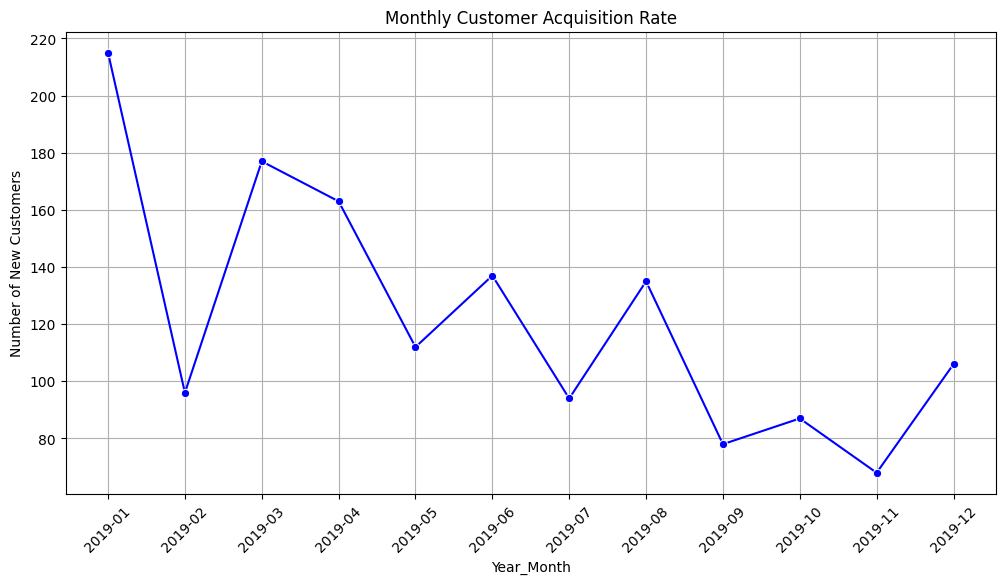

In [6]:
# plot the line plot graph for the above data
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_acquisition,x=monthly_acquisition['Year_Month'].astype(str), y=monthly_acquisition['New_Customers'],marker='o',color='blue')
plt.title('Monthly Customer Acquisition Rate')
plt.xlabel('Year_Month')
plt.ylabel('Number of New Customers')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Here are some strategic considerations to address fluctuations and foster consistent growth:**

**Optimize Marketing ROI** 💰: Our analysis reveals a potential disconnect between marketing spend and new customer acquisition. To maximize profitability, we must rigorously evaluate the effectiveness of our current online and offline marketing channels. By refining our targeting strategies, exploring innovative campaign approaches, and potentially diversifying our marketing mix, we can enhance customer attraction and ensure a higher return on investment for our marketing efforts.

**Unlock Untapped Market Potential:**🗺️: Data highlights lower acquisition and sales performance in Washington D.C,New York and New Jersey. This represents a significant opportunity for growth. By developing targeted marketing strategies and localized initiatives in these key regions, we can increase brand visibility, attract new customers, and expand our market penetration, driving overall revenue growth.


# Question 2 🤔📊📈📉

2.   **Analyze the data** 📊 to determine if **certain months consistently** show higher 📈 or lower acquisition rates 📉. How can the company capitalize on high-performing months 💪 and improve performance during slower periods? 🤔

*  Based on the provided line plot of monthly customer acquisition rates, a discernible pattern emerges. January consistently exhibits higher acquisition rates 📈 compared to February, which shows a subsequent decrease 📉. Generally, we observe an alternating trend of increasing and decreasing acquisition rates month-over-month. An exception to this pattern is noted in the March-April period, where there is a continuous decline in acquisition rates 📉.

In [7]:
# Extract the month from the 'Date' column and create a new 'Month' column.
df_marketingSpend['Month']=pd.to_datetime(df_marketingSpend['Date']).dt.month
# Group the DataFrame by the extracted 'Month' and calculate the sum of 'Online_Spend' and 'Offline_Spend' for each month.
monthly_marketing_spend=df_marketingSpend.groupby('Month')[['Online_Spend','Offline_Spend']].sum().reset_index()
monthly_marketing_spend

,Month,Online_Spend,Offline_Spend
0,1,58328.95,96600
1,2,55807.92,81300
2,3,48750.09,73500
3,4,61026.83,96000
4,5,52759.64,65500
5,6,53818.14,80500
6,7,52717.85,67500
7,8,57404.15,85500
8,9,52514.54,83000
9,10,57724.65,93500


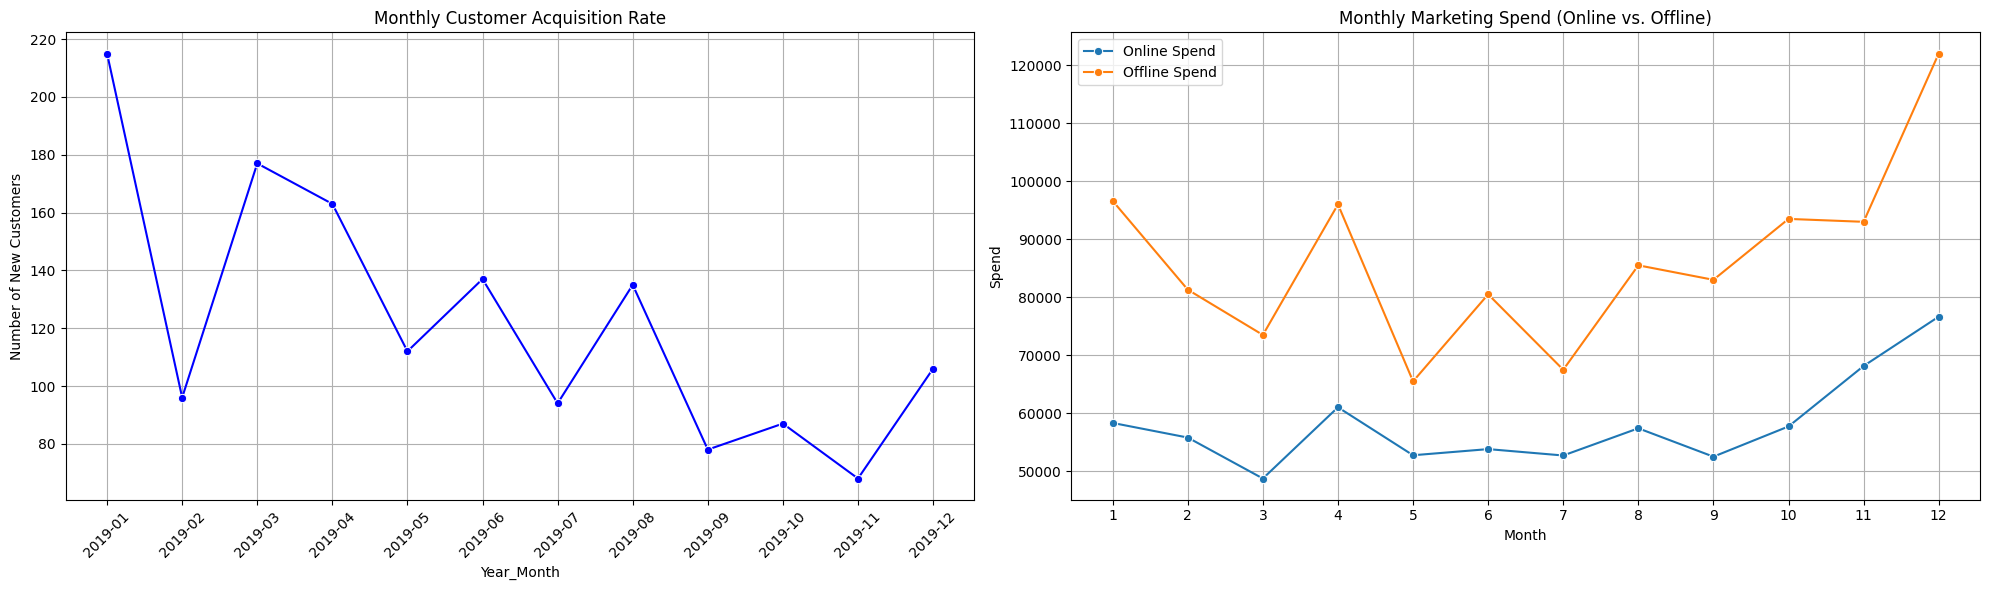

In [8]:
# plot the line plot graph for the above data
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.lineplot(ax=axes[0], data=monthly_acquisition, x=monthly_acquisition['Year_Month'].astype(str), y=monthly_acquisition['New_Customers'], marker='o', color='blue')
axes[0].set_title('Monthly Customer Acquisition Rate')
axes[0].set_xlabel('Year_Month')
axes[0].set_ylabel('Number of New Customers')
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)

# Plot Monthly Marketing Spend (Online vs. Offline)
sns.lineplot(ax=axes[1], data=monthly_marketing_spend, x='Month', y='Online_Spend', label='Online Spend', marker='o')
sns.lineplot(ax=axes[1], data=monthly_marketing_spend, x='Month', y='Offline_Spend', label='Offline Spend', marker='o')
axes[1].set_title('Monthly Marketing Spend (Online vs. Offline)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Spend')
axes[1].set_xticks(monthly_marketing_spend['Month']) # Ensure all months are shown on x-axis
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

* **Capitalizing on Momentum**: High-Performing Months 💪 During months exhibiting high customer acquisition rates, we should strategically increase our investment in online marketing channels. This allows us to capitalize on existing market momentum, amplifying our reach and attracting an even larger customer base. 📈💰

* Innovation and Optimization 💡 In these periods of strong performance, we have an opportunity to experiment with new online marketing strategies and optimize existing campaigns for maximum impact. By continuously refining our approach, we can sustain high acquisition rates and maximize return on investment. ✨✅

* **Addressing Slower Periods**: Lower-Performing Months 📉 During months where customer acquisition rates are lower, we should consider increasing our overall marketing capital allocation. The observed correlation between decreased marketing spend and lower acquisition rates suggests that sustained investment is crucial for maintaining a healthy inflow of new customers. 💲📊

* Targeted Strategies 🎯 While increasing investment, it's essential to develop targeted strategies to understand and address the specific reasons for lower performance in these months. This might involve analyzing consumer behavior, market conditions, or the competitive landscape during these periods. 🤔🔬

* Evaluating the Exception: February-March-April Anomaly 🤔🗓️ The pattern observed in February, March, and April, where acquisition rates decline despite marketing spend fluctuations, warrants further investigation. We need to analyze the specific factors influencing customer behavior during these months to develop tailored interventions. 🕵️‍♀️🚧

# Question 3 🤔📊📈📉

3. Identify periods with the **strongest and weakest retention rates**💪📉. What strategies could be **implemented to improve retention** during weaker months?

In [24]:
# Convert 'Transaction_Date' column to datetime objects and extract the year and month
df_onlineSales['Year_Month']=pd.to_datetime(df_onlineSales['Transaction_Date']).dt.to_period('M')
# Group by 'Year_Month' and count the number of unique customers to get the total number of customers per month
customer_per_month=df_onlineSales.groupby('Year_Month')['CustomerID'].nunique().reset_index()
# Rename the columns for clarity
customer_per_month.columns = ['Year_Month', 'Total_Customers']
# Create a copy of the customer_per_month DataFrame to avoid modifying the original
customer_previous_month=customer_per_month.copy()
# Shift the 'Total_Customers' column by one position to get the previous month's total customers
customer_previous_month['Total_Customers']=customer_previous_month['Total_Customers'].shift(1)
# Remove rows with NaN values (the first month will have NaN after the shift)
customer_previous_month.dropna(inplace=True)
# Convert the 'Total_Customers' column to integer type
customer_previous_month['Total_Customers']=customer_previous_month['Total_Customers'].astype(int)
# Merge the current month's customer count with the previous month's customer count
df_customer_counts_merged = df_customer_counts_merged = pd.merge(
    customer_per_month,
    customer_previous_month,
    on='Year_Month',
    suffixes=('_current', '_previous') # Suffixes to differentiate columns after merging
)

# Merge the DataFrame with customer counts (current and previous month)
df_retention_analysis = pd.merge(
    df_customer_counts_merged,
    monthly_acquisition[['Year_Month', 'New_Customers']],
    on='Year_Month'
)

# Calculate the retention rate for each month.
# Retention Rate = (Total Customers in Current Month - New Customers in Current Month) / Total Customers in Previous Month
# This formula calculates the proportion of customers from the previous month who are still active in the current month.
df_retention_analysis['Retention_rate'] = round(((df_retention_analysis['Total_Customers_current'] - df_retention_analysis['New_Customers']) / df_retention_analysis['Total_Customers_previous'])*100,2)


print(f'Month with the strongest retention rate: {df_retention_analysis.loc[df_retention_analysis["Retention_rate"].idxmax()]["Year_Month"]}')
print(f'Month with the weakest retention rate: {df_retention_analysis.loc[df_retention_analysis["Retention_rate"].idxmin()]["Year_Month"]}')

Month with the strongest retention rate: 2019-08
Month with the weakest retention rate: 2019-02


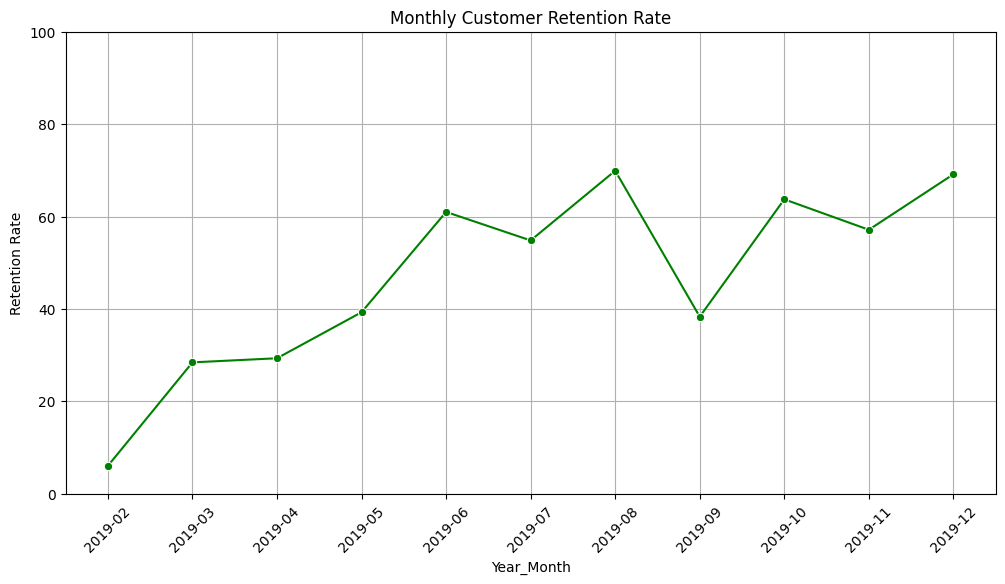

In [28]:
# Plot lineplot with above given data
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_retention_analysis, x=df_retention_analysis['Year_Month'].astype(str), y='Retention_rate', marker='o', color='green')
plt.title('Monthly Customer Retention Rate')
plt.xlabel('Year_Month')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

Strategies could be implemented to improve retention during weaker months :🤔
1. **Implement a robust Customer** 📊 Conduct targeted surveys, feedback forms, and potentially focus groups during weaker retention periods. The goal is to proactively gather actionable insights into customer pain points, unmet needs, and overall satisfaction levels. This data will inform strategic adjustments to products, services, or customer experience that directly address identified areas for improvement. ✅
2. **Develop and deploy targeted Customer Loyalty and Incentive Programs**: 💰 During months with lower retention, introduce or enhance loyalty programs that reward repeat business. This could include tiered rewards based on purchase frequency or value, exclusive discounts or offers for loyal customers, or early access to new products or promotions. These incentives aim to increase the perceived value of continuing to engage with the company and encourage repeat purchases. 💪

